In [1]:
# handling missing value in dataset is necessary?
"""
Yes, because many machine learning algorithm do not allow missing value.
"""

'\nYes, because many machine learning algorithm do not allow missing value.\n'

In [2]:
# pre_processing_2 excel file

In [3]:
# import basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# reading the dataset
df=pd.read_excel("datasets/preprocessing_2.xlsx")
df.head()

,Dept,Age,Experience,Salary,Education
0,HR,32.0,9,40000.0,Under_Graduate
1,HR,33.0,12,48000.0,Master
2,IT,35.0,12,45000.0,Master
3,IT,NaN,12,46000.0,Graduate
4,HR,34.0,11,NaN,Graduate


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         26 non-null     float64
 2   Experience  24 non-null     object 
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [10]:
df.describe()

,Age,Salary
count,26.000000,26.000000
mean,35.538462,39326.923077
std,16.966392,10157.698861
min,0.000000,22000.000000
25%,29.500000,35250.000000
50%,34.500000,41000.000000
75%,44.250000,45000.000000
max,75.000000,60000.000000


In [11]:
df.describe(include="O")#view the categorical info also

,Dept,Experience,Education
count,26,24,26
unique,4,12,4
top,HR,12,Master
freq,11,5,10


<AxesSubplot:xlabel='Salary'>

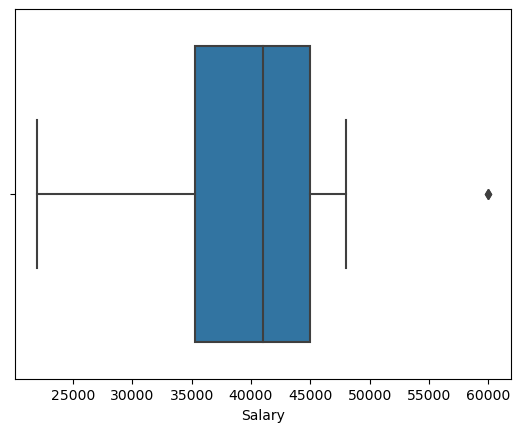

In [12]:
# finding the outlier visualization
sns.boxplot(df["Salary"])

<AxesSubplot:xlabel='Age'>

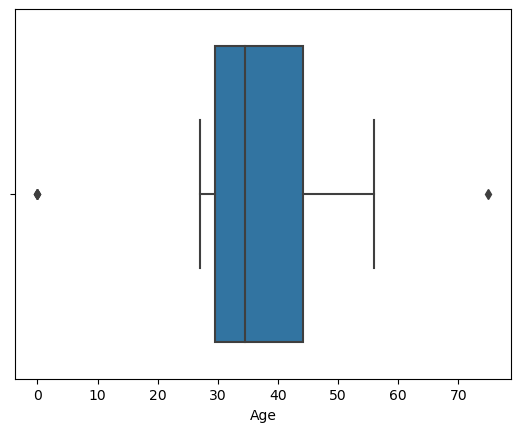

In [13]:
sns.boxplot(df["Age"])

In [14]:
df.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of      Dept    Age  Experience  Salary  Education
0   False  False       False   False      False
1   False  False       False   False      False
2   False  False       False   False      False
3   False   True       False   False      False
4   False  False       False    True      False
5   False  False       False   False       True
6   False  False       False   False      False
7   False   True       False   False      False
8   False  False        True   False      False
9   False  False       False    True      False
10  False  False        True   False      False
11   True  False       False   False      False
12   True  False       False   False       True
13  False  False       False   False      False
14  False  False        True   False      False
15  False  False        True   False      False
16  False  False       False   False      False
17  False  False       False   False      False
18  False  False       Fal

In [15]:
df.isnull().any()

Dept          True
Age           True
Experience    True
Salary        True
Education     True
dtype: bool

In [16]:
df.isnull().sum()

Dept          2
Age           2
Experience    4
Salary        2
Education     2
dtype: int64

In [17]:
df.isnull().sum().sum()

12

In [18]:
# calculate the percentage of missing value
df.isnull().sum()/len(df)*100

Dept           7.142857
Age            7.142857
Experience    14.285714
Salary         7.142857
Education      7.142857
dtype: float64

In [19]:
# isna() and isnull() functions are used for finding missing value

In [20]:
df.isna().sum().sum()

12

In [21]:
# imputation approach :- MEAN , MEDIAN ,MODE.
"""
df["Experience"]=df["Experience"].fillna(df["Experience"].mean())
df["Experience"]=df["Experience"].fillna(df["Experience"].median())
df["Dept"]=df["Dept"].fillna(df["Dept"].mode()[0])
# important:- There can be multiple modes , it will take the first one by default.

"""

'\ndf["Experience"]=df["Experience"].fillna(df["Experience"].mean())\ndf["Experience"]=df["Experience"].fillna(df["Experience"].median())\ndf["Dept"]=df["Dept"].fillna(df["Dept"].mode()[0])\n# important:- There can be multiple modes , it will take the first one by default.\n\n'

In [22]:
df1=df.copy()

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         26 non-null     float64
 2   Experience  24 non-null     object 
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [24]:
df1["Age"]=df1["Age"].fillna(df1["Age"].mean())

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  24 non-null     object 
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [26]:
#df1["Experience"]=df1["Experience"].fillna(df1["Experience"].mean())

In [27]:
# recheck the data type of experience , we find it is not numeric
# convert it into numeric
#df1["Experience"]=pd.to_numeric(df1["Experience"])

In [28]:
# first convert the non numeric  or symbols as Null value
df1["Experience"].mask((df1["Experience"].eq(".")),inplace=True)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  23 non-null     object 
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [26]:
# now in the experience column we have 5 missing value becuase we converted "." as null

In [27]:
# try again to convert it into numeric
#df1["Experience"]=pd.to_numeric(df1["Experience"])

In [30]:
# first convert the non numeric  or symbols as Null value
df1["Experience"].mask((df1["Experience"].eq("%")),inplace=True)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  22 non-null     object 
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [32]:
# now in the experience column we have 6 missing value becuase we converted "%" as null

In [33]:
# try again to convert it into numeric
#df1["Experience"]=pd.to_numeric(df1["Experience"])

In [34]:
# first convert the non numeric  or symbols as Null value
df1["Experience"].mask((df1["Experience"].eq("a")),inplace=True)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  21 non-null     object 
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [36]:
df1["Experience"]=pd.to_numeric(df1["Experience"])

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  21 non-null     float64
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.2+ KB


In [38]:
df1["Experience"]=df1["Experience"].fillna(df1["Experience"].mean())

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  28 non-null     float64
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.2+ KB


In [40]:
df1["Salary"]=df1["Salary"].fillna(df1["Salary"].mean())

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  28 non-null     float64
 3   Salary      28 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.2+ KB


In [43]:
df1["Dept"].value_counts()

HR           11
IT            7
Sales         5
Marketing     3
Name: Dept, dtype: int64

In [44]:
df1["Education"].value_counts()

Master            10
Under_Graduate     8
Graduate           7
a                  1
Name: Education, dtype: int64

In [45]:
df1["Education"].mask((df1["Education"].eq("a")),inplace=True)

In [46]:
df1["Education"].isnull().sum()

3

In [48]:
df1["Education"]=df1["Education"].fillna(df1["Education"].mode())

In [49]:
df1["Education"].isnull().sum()

3

In [50]:
df1["Education"]=df1["Education"].fillna(df1["Education"].mode()[0])
df1["Education"].isnull().sum()

0

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  28 non-null     float64
 3   Salary      28 non-null     float64
 4   Education   28 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.2+ KB


In [52]:
df1["Dept"]=df1["Dept"].fillna(df1["Dept"].mode()[0])
df1["Dept"].isnull().sum()

0

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        28 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  28 non-null     float64
 3   Salary      28 non-null     float64
 4   Education   28 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.2+ KB


In [54]:
# in the age column there is one observation with 0 year
df1["Age"]=np.where(df1["Age"]==0,(df1["Age"].mean()),df1["Age"])

In [55]:
df1.describe()

,Age,Experience,Salary
count,28.000000,28.000000,28.000000
mean,39.346154,11.023810,39326.923077
std,10.543659,5.935574,9774.250286
min,27.000000,2.000000,22000.000000
25%,32.750000,10.750000,35750.000000
50%,35.538462,11.023810,39663.461538
75%,42.750000,12.000000,45000.000000
max,75.000000,35.000000,60000.000000


In [56]:
# one line of code to apply in many columns
col1=["Age","Experience","Salary"]
df1[col1]=df1[col1].fillna(df1[col1].median())

In [57]:
# we can drop all missing value by using this code

In [58]:
df3=df.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        26 non-null     object 
 1   Age         26 non-null     float64
 2   Experience  24 non-null     object 
 3   Salary      26 non-null     float64
 4   Education   26 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [59]:
df3.dropna(inplace=True)

In [60]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        17 non-null     object 
 1   Age         17 non-null     float64
 2   Experience  17 non-null     object 
 3   Salary      17 non-null     float64
 4   Education   17 non-null     object 
dtypes: float64(2), object(3)
memory usage: 816.0+ bytes


In [61]:
df3.describe()

,Age,Salary
count,17.000000,17.000000
mean,34.647059,38823.529412
std,15.783461,12115.255332
min,0.000000,22000.000000
25%,29.000000,26000.000000
50%,35.000000,40000.000000
75%,42.000000,45000.000000
max,56.000000,60000.000000


In [62]:
# feature Engineering -outlier treatment

<AxesSubplot:ylabel='Age'>

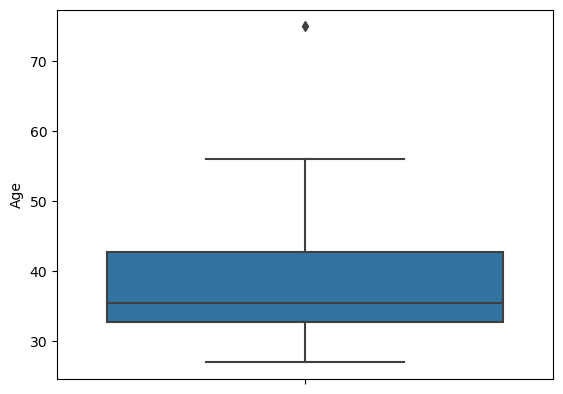

In [63]:
sns.boxplot(y="Age",data=df1)

<AxesSubplot:>

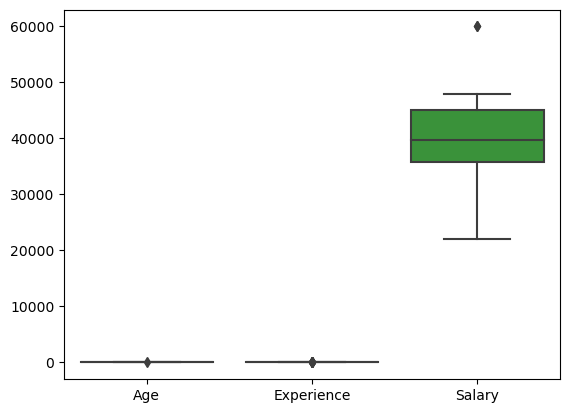

In [65]:
sns.boxplot(data=df1)

<AxesSubplot:ylabel='Salary'>

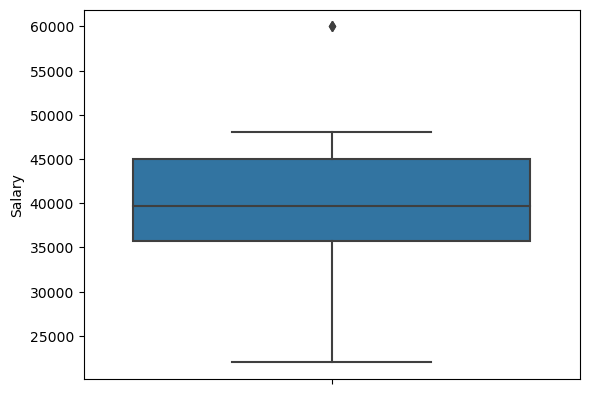

In [66]:
sns.boxplot(y="Salary",data=df1)

<AxesSubplot:ylabel='Experience'>

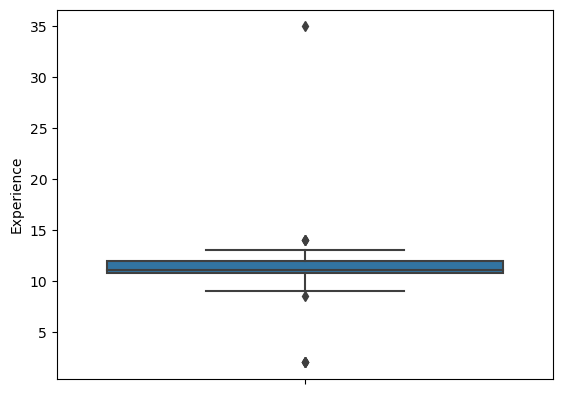

In [67]:
sns.boxplot(y="Experience",data=df1)

<AxesSubplot:xlabel='Experience', ylabel='Salary'>

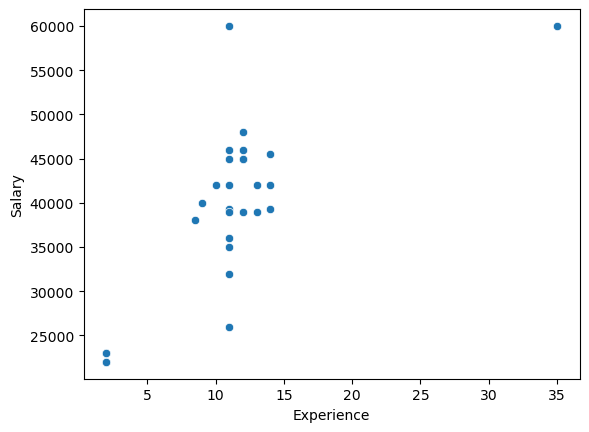

In [68]:
sns.scatterplot(x="Experience",y="Salary",data=df1)

<AxesSubplot:xlabel='Age', ylabel='Salary'>

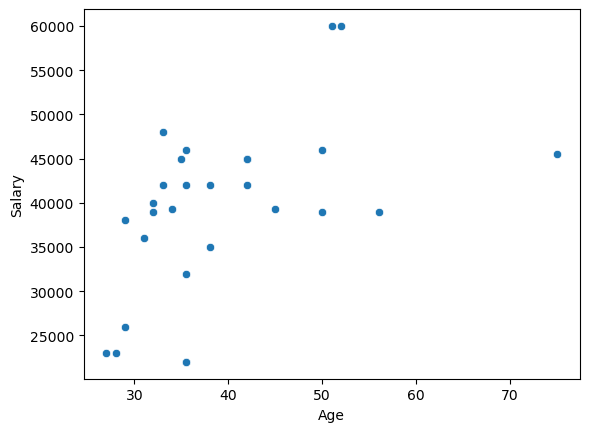

In [69]:
sns.scatterplot(x="Age",y="Salary",data=df1)

<AxesSubplot:xlabel='Experience', ylabel='Salary'>

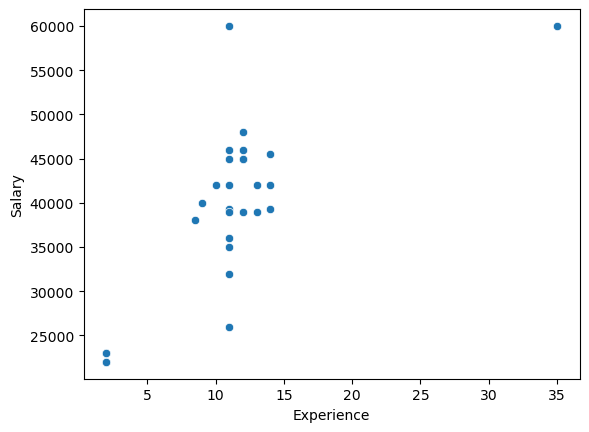

In [70]:
sns.scatterplot(x="Experience",y="Salary",data=df1)

In [71]:
"""
# IQR approach 
positive outlier>Q3+1.5IQR
negative outlier<Q1-1.5IQR

#Z Score approach
positive outlier>mean+3 SD
negative outlier<mean-3 SD
"""

'\n# IQR approach \npositive outlier>Q3+1.5IQR\nnegative outlier<Q1-1.5IQR\n\n#Z Score approach\npositive outlier>mean+3 SD\nnegative outlier<mean-3 SD\n'

# removal of outlier= trimming approach

In [72]:
df3=df1.copy()

In [73]:
# using IQR approach
"""
find the Q1,Q3,IQR, Upper_limit lower_limit
"""
Q1=df3.quantile(0.25)
Q3=df3.quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
print("Upper_limit \n",upper_limit)
lower_limit=Q1-1.5*IQR
print("Lower_limit \n",lower_limit)

Upper_limit 
 Age              57.750
Experience       13.875
Salary        58875.000
dtype: float64
Lower_limit 
 Age              17.750
Experience        8.875
Salary        21875.000
dtype: float64


In [74]:
"""
(|)pipe function mean or either
(~)tilda function , it is comparing
any(axis=1) move column wise find the outlier and drop it.
"""

'\n(|)pipe function mean or either\n(~)tilda function , it is comparing\nany(axis=1) move column wise find the outlier and drop it.\n'

In [75]:
df4=df3[~((df3<(lower_limit))|(df3>(upper_limit))).any(axis=1)]

In [76]:
df4.describe()

,Age,Experience,Salary
count,18.000000,18.000000,18.000000
mean,37.867521,11.341270,40351.495726
std,7.431497,0.967320,5558.401940
min,29.000000,9.000000,26000.000000
25%,33.000000,11.005952,39000.000000
50%,35.538462,11.023810,41000.000000
75%,41.000000,12.000000,45000.000000
max,56.000000,13.000000,48000.000000


In [77]:
df3.describe()

,Age,Experience,Salary
count,28.000000,28.000000,28.000000
mean,39.346154,11.023810,39326.923077
std,10.543659,5.935574,9774.250286
min,27.000000,2.000000,22000.000000
25%,32.750000,10.750000,35750.000000
50%,35.538462,11.023810,39663.461538
75%,42.750000,12.000000,45000.000000
max,75.000000,35.000000,60000.000000


In [78]:
df3.shape

(28, 5)

In [79]:
df4.shape

(18, 5)

# Flooring caping approach adjustment of outliers - no delete

In [80]:
"""Outliers Treatment
Flooring And Capping :-quantile-based technique, (e.g 25th percentile) for the lower 
values and capping(e.g for the 75th percentile) for the higher values. 
These percentile values will be used for the quantile-based flooring and capping.
"""

'Outliers Treatment\nFlooring And Capping :-quantile-based technique, (e.g 25th percentile) for the lower \nvalues and capping(e.g for the 75th percentile) for the higher values. \nThese percentile values will be used for the quantile-based flooring and capping.\n'

In [83]:
data3=df3.copy()
data3.describe()

,Age,Experience,Salary
count,28.000000,28.000000,28.000000
mean,39.346154,11.023810,39326.923077
std,10.543659,5.935574,9774.250286
min,27.000000,2.000000,22000.000000
25%,32.750000,10.750000,35750.000000
50%,35.538462,11.023810,39663.461538
75%,42.750000,12.000000,45000.000000
max,75.000000,35.000000,60000.000000


In [84]:
# we have to decide the upper limit and lower limit
# using IQR approach
"""
find the Q1,Q3,IQR, Upper_limit lower_limit
"""
Q1=data3.quantile(0.25)
Q3=data3.quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
print("Upper_limit \n",upper_limit)
lower_limit=Q1-1.5*IQR
print("Lower_limit \n",lower_limit)

Upper_limit 
 Age              57.750
Experience       13.875
Salary        58875.000
dtype: float64
Lower_limit 
 Age              17.750
Experience        8.875
Salary        21875.000
dtype: float64


In [86]:
data3["Age"]=np.where(data3["Age"]>57.750,57.750,np.where(data3["Age"]<47.750,47.750,data3["Age"]))

In [89]:
data3.describe()

,Age,Experience,Salary
count,28.000000,28.000000,28.000000
mean,48.830357,11.023810,39326.923077
std,2.539552,5.935574,9774.250286
min,47.750000,2.000000,22000.000000
25%,47.750000,10.750000,35750.000000
50%,47.750000,11.023810,39663.461538
75%,47.750000,12.000000,45000.000000
max,57.750000,35.000000,60000.000000


In [90]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        28 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  28 non-null     float64
 3   Salary      28 non-null     float64
 4   Education   28 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.2+ KB


In [91]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        28 non-null     object 
 1   Age         28 non-null     float64
 2   Experience  28 non-null     float64
 3   Salary      28 non-null     float64
 4   Education   28 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.2+ KB


In [94]:
data3["Experience"]=np.where(data3["Experience"]>14,14,np.where(data3["Experience"]<8,8,data3["Experience"]))

In [83]:
# same approach we can do for the salary

<AxesSubplot:>

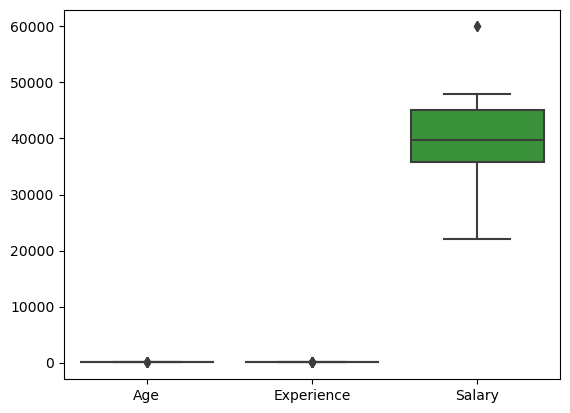

In [95]:
sns.boxplot(data=data3)

In [96]:
data4=df3.copy()

In [97]:
#USING Z score concept
#Capping approach
# define the upper and lower limit
up_limit=data4.mean()+3*data4.std()
low_limit=data4.mean()-3*data4.std()
print("Upper limit Z score \n",up_limit)
print("Lower limit Z score \n",low_limit)

Upper limit Z score 
 Age              70.977131
Experience       28.830532
Salary        68649.673936
dtype: float64
Lower limit Z score 
 Age               7.715176
Experience       -6.782913
Salary        10004.172218
dtype: float64


In [98]:
df3.describe()

,Age,Experience,Salary
count,28.000000,28.000000,28.000000
mean,39.346154,11.023810,39326.923077
std,10.543659,5.935574,9774.250286
min,27.000000,2.000000,22000.000000
25%,32.750000,10.750000,35750.000000
50%,35.538462,11.023810,39663.461538
75%,42.750000,12.000000,45000.000000
max,75.000000,35.000000,60000.000000


In [ ]:
# capping approach using Z score limit

In [99]:
data4["Age"]=np.where(data4["Age"]>70,70,np.where(data4["Age"]<7,7,data4["Age"]))

In [ ]:
# for the trimming approach same as discussed above with IQR 

In [100]:
df3.head()

,Dept,Age,Experience,Salary,Education
0,HR,32.000000,9.0,40000.000000,Under_Graduate
1,HR,33.000000,12.0,48000.000000,Master
2,IT,35.000000,12.0,45000.000000,Master
3,IT,35.538462,12.0,46000.000000,Graduate
4,HR,34.000000,11.0,39326.923077,Graduate


In [101]:
# some other methods are there
"""
square root approach
cube root
log # many a times it convert the data infinity also

"""

'\nsquare root approach\ncube root\nlog # many a times it convert the data infinity also\n\n'